# Introduction

The US Census Dataset is an important tool to assess and understand the different dynamics of American society to better shape policy that reflects the current affairs. Analyzing this data can help governments decide how to allocate resources based on the needs of specific counties. Therefore, data analysis is critical for the development of society. 

In this project, we have narrowed our scope to analyze four of the biggest stats in America: Califronia, Texas, New York and Florida. We have chosen to analyze these
praticular states because they are uniquely diverse and reflective of the American population as a whole. In addition, California and New York and historically Democratic governed states - meaning that the Democratic Party has formed government in the state the most, historically. California has one of the highest populations in the in the United States and can be used to generalize most of the West coast states. New York is heavily populated Democratic state that reflects the general demographics of Democratic East coast stats. On the other side, Texas and Florida are two of the biggest historically Republican states on the Western and Eastern parts of the United States respectively. Texas, a historically Republican state, has a large population that is diverse - making it a great state to sample from. Lastly, Florida is a deeply Republican state with a rich urban and suburban population that reflects the belief and thought of Americans across the country. 

# Dataset

As previously mentioned, the [US Census Dataset from 2017]("https://www.kaggle.com/muonneutrino/us-census-demographic-data") is the data set we have decided to use. Because the data is fairly recent, we are extremely confident that the data best reflects the demographics of individuals by state in 2021. The dataset contains many variables that can used to analyze such as total population, ethnicity, employment rate, unemployment rate, poverty, and more. 

# Research Questions

Research Question # 1: Are people in Republican governed states poorer than those in Democratic governed states?

Research Question # 2: Is ethnicity correlated with poverty?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from Scripts import project_functions

In [3]:
df = project_functions.load_and_process('acs2017_county_data.csv')
df.head()

CountyId       State            County  TotalPop     Men   Women  Hispanic  \
0      6001  California    Alameda County   1629615  799649  829966      22.5   
1      6003  California     Alpine County      1203     664     539       9.7   
2      6005  California     Amador County     37306   20005   17301      13.2   
3      6007  California      Butte County    225207  111587  113620      15.7   
4      6009  California  Calaveras County     45057   22292   22765      11.5   

   White  Black  Native  ...  Production  OtherTransp  WorkAtHome  \
0   32.2   10.7     0.3  ...         9.2          3.6         6.0   
1   64.6    1.5    20.6  ...         8.3          1.6        14.0   
2   79.3    2.0     0.7  ...        10.1          1.1         6.4   
3   72.9    1.5     0.7  ...        10.1          3.9         5.7   
4   82.0    0.6     0.9  ...        11.5          0.6         8.3   

   MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0         32.5    826310         79.3        13.2           7.3         0.1   
1         21.9       374         58.6        30.2          11.2         0.0   
2         32.0     13444         63.9        21.0          14.7         0.4   
3         20.1     93439         72.8        17.2           9.7         0.4   
4         35.5     16721         67.6        18.2          13.7         0.4   

   Unemployment  
0           6.0  
1          14.6  
2           9.3  
3           9.1  
4           7.1  

[5 rows x 29 columns]

In [4]:
# Describing the Dataset

df.describe().T

count           mean            std      min      25%  \
CountyId         441.0   35492.684807   17083.051102   6001.0  12105.0   
TotalPop         441.0  241449.283447  693148.227348     74.0  12972.0   
Men              441.0  119052.217687  341169.880650     39.0   6650.0   
Women            441.0  122397.065760  352045.022151     35.0   5989.0   
Hispanic         441.0      26.996825      22.393134      1.5      9.6   
White            441.0      61.559864      21.608888      0.6     47.2   
Black            441.0       6.901814       7.443716      0.0      1.5   
Native           441.0       0.521769       1.336473      0.0      0.1   
Asian            441.0       2.126757       4.176929      0.0      0.3   
Pacific          441.0       0.091156       0.243065      0.0      0.0   
Income           441.0   52126.344671   13627.602260  24794.0  43529.0   
IncomeErr        441.0    3652.192744    3571.113173    262.0   1546.0   
IncomePerCap     441.0   26380.904762    6959.601627  12543.0  22152.0   
IncomePerCapErr  441.0    1652.573696    1594.750753    129.0    695.0   
Poverty          441.0      16.054422       5.534720      2.8     12.6   
ChildPoverty     441.0      22.462132       9.106596      0.0     16.6   
Professional     441.0      31.202721       6.846136     14.0     26.5   
Production       441.0      13.151020       4.703983      0.0      9.8   
OtherTransp      441.0       1.748753       1.464350      0.0      1.0   
WorkAtHome       441.0       4.527211       2.483259      0.0      2.9   
MeanCommute      441.0      24.191837       5.766011      7.7     20.1   
Employed         441.0  111494.750567  330262.742344     39.0   4770.0   
PrivateWork      441.0      73.722449       7.133625     43.6     70.1   
PublicWork       441.0      17.734694       5.944095      7.5     13.6   
SelfEmployed     441.0       8.270295       3.216068      0.0      6.0   
FamilyWork       441.0       0.271655       0.426443      0.0      0.1   
Unemployment     441.0       6.663719       2.768327      0.0      5.1   

                     50%       75%         max  
CountyId         48067.0   48287.0     48507.0  
TotalPop         40544.0  155719.0  10105722.0  
Men              20588.0   78798.0   4979641.0  
Women            20471.0   79545.0   5126081.0  
Hispanic            20.6      39.2        99.2  
White               64.8      77.6        95.8  
Black                4.5       9.7        55.3  
Native               0.2       0.5        20.6  
Asian                0.8       1.9        34.9  
Pacific              0.0       0.1         3.4  
Income           50000.0   57813.0    106761.0  
IncomeErr         2698.0    4541.0     32455.0  
IncomePerCap     25461.0   29693.0     69529.0  
IncomePerCapErr   1248.0    2007.0     13175.0  
Poverty             15.7      18.7        41.5  
ChildPoverty        22.0      27.2        62.3  
Professional        30.6      34.5        60.0  
Production          13.2      16.1        48.7  
OtherTransp          1.4       2.1        10.8  
WorkAtHome           4.1       5.7        18.1  
MeanCommute         23.8      28.0        44.2  
Employed         16629.0   68640.0   4805817.0  
PrivateWork         74.9      78.5        86.5  
PublicWork          16.6      20.4        47.7  
SelfEmployed         7.6       9.8        20.4  
FamilyWork           0.2       0.3         6.1  
Unemployment         6.4       7.9        26.3

In [5]:
df.dtypes

CountyId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Income               int64
IncomeErr            int64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Production         float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
dtype: object

In [6]:
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Production', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

# Methodology and Result

### Poverty And Income


Note: Seems like Poverty and Income are not linearly related, but might be quadratically related


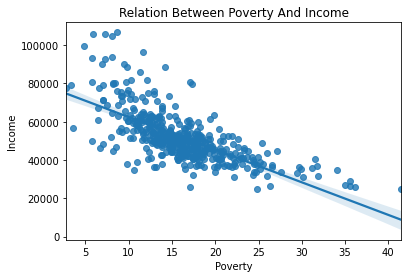

In [7]:
ax  = sns.regplot(x="Poverty", y="Income", data=df).set_title("Relation Between Poverty And Income")
print("Note: Seems like Poverty and Income are not linearly related, but might be quadratically related")

**Figure 1.0: Shows the relation between Poverty and Income. As poverty rate increases, total income also decreases. In other words, individuals with lower income tend to be at a higher risk for experiencing poverty.**

### Poverty And Unemployement

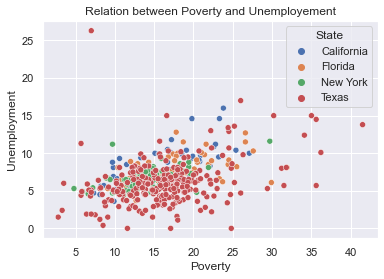

In [8]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="Poverty", y = "Unemployment", hue = "State", data = df).set_title("Relation between Poverty and Unemployement")

**Figure 2.0: Shows the relation between Poverty and Unemployment by State. Quite easily, we can see that Texas is over-represented in this figure. Many Texans are considered to be unemployed which can lead to poverty. Texas also represent the many outliers, indicating that the issue of poverty and unemployment is widely prevelant across many different counties. California appears to also have a half dozen counties that are high in unemployment and poverty. These issues may have historical roots for many of these counties.**

In [9]:
print(df[['Poverty','ChildPoverty']].corr())


               Poverty  ChildPoverty
Poverty       1.000000      0.904335
ChildPoverty  0.904335      1.000000


 **Not Suprisingly Child Poverty Rate and Poverty Rates are correlated**

### Income Per Capita by State

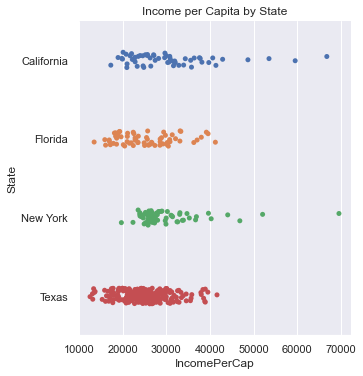

In [10]:
sns.catplot(x="IncomePerCap",y="State",data=df)
plt.title("Income per Capita by State")
plt.show()

**Figure 3.0: Shows the relation between Income Per Capita by State. Across California, Florida, New York and Texas, we can see that Californians and New Yorkers earn much more per capita than Floridians and Texans. This figure is important as it further reinforces the idea that Demoratically run governments have high paying, skillful work. In Texas and Florida, income per capita is much lower. This is especially important when you consider that Texas and Florida are amongst the seven states that have no state income tax. Ultimately, income per capita could reflect higher cost of living in a state and doesn't provide us with a clear answer on our research question; however, it helps us better understand our research question in conjunction with the other data collected.**

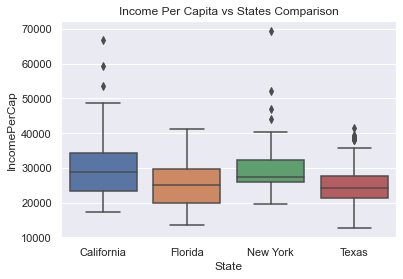

In [11]:
ax = sns.boxplot(y="IncomePerCap", x ="State", data = df).set_title("Income Per Capita vs States Comparison")

**Figure 3.5: Another visual of Figure 3.0.**

### Unemployment by State

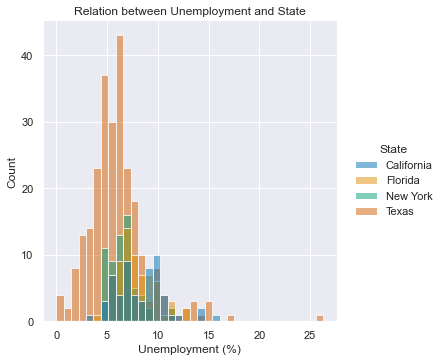

In [12]:
ax = sns.displot(x = "Unemployment", hue = "State", data=df, palette = "colorblind")
plt.title("Relation between Unemployment and State")
ax.set(xlabel = "Unemployment (%)", ylabel = "Count")
plt.show()


**Figure 4.0: Shows the relation between Unemployment and State. Across California, Florida, New York and Texas, we can see that unemployment rates are fairly low with a couple outliers. This figure is important as it shows the prevelance of unemployment. In Texas, many counties report low percentages but frequent unemployment in comparison to California. Unemployment figures, such as this, help us understand how Republican and Democratic state governments prioritize policy that benefits the unemployed.**

### Employment by State¶

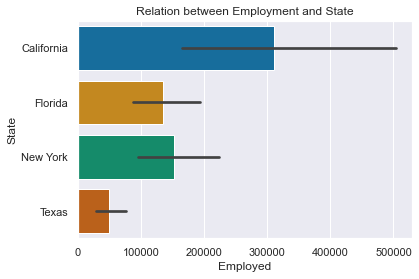

In [13]:
ax = sns.barplot(x = "Employed", y = "State", data=df, palette = "colorblind")
plt.title("Relation between Employment and State")
ax.set(xlabel = "Employed", ylabel = "State")
plt.show()

**Figure 5.0: Shows the relation between Employment and State. Across California and New York, we can see that employment rates are fairly high with obvious outliers for larger counties. This figure is important as it shows total employment across the states. California and New York, both historically Democratic states, employ extremely large populations. Compared with Figure 4.0, we can see that the Democratic governed states provide more employment while also reducing the number of unemployed, despite their larger population sizes.**

### Income vs State

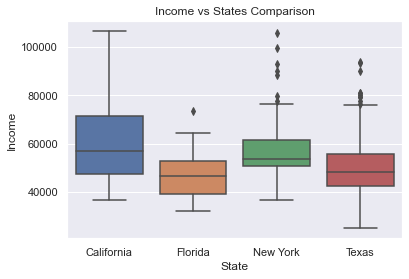

In [14]:
ax = sns.boxplot(y="Income", x ="State", data = df).set_title("Income vs States Comparison")

**Figure 6.0: Shows the relation between Income and State. California and New York have higher income levels in comparison to Texas and Florida**

### Total Population by State

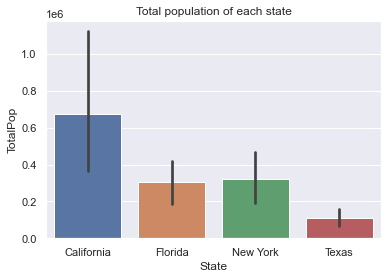

In [15]:
ax = sns.barplot(x = "State", y = "TotalPop",data = df).set_title("Total population of each state")



**Figure 7.0: Shows the total population of each state. California and New York have some of the largest populations in the country. This could have an affect on how individuals are treated by government and their policies.**

### Poverty per State

[Text(0.5, 0, 'State'), Text(0, 0.5, 'Poverty (%)')]

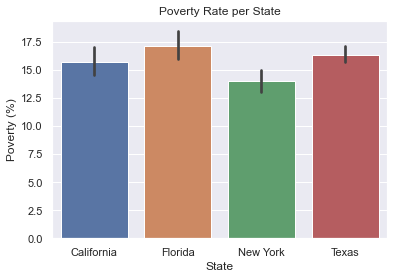

In [30]:
ax = sns.barplot(x=df['State'],y=df['Poverty'])
plt.title("Poverty Rate per State")
ax.set(xlabel = "State", ylabel = "Poverty (%)")


**Figure 8.0: Shows the Poverty Rate per State. Florida and Texas have the highest poverty rate but not by much. This may be because of New York's and Califorina's high population.**

# Analysis

In the figures above, we have conducted an EDA to assess the relationship between the respective states and poverty. While there was a 'poverty rate' vairable within the dataset, we have considered other variables to get a competitive, reliable and coherant analysis of our research question. First, we checked the relationship between poverty and income. **Figure 1.0** shows the relationship between poverty and income. This figure demonstrates that lower income earning states experience some form of poverty but it's not linearly related. **Figure 2.0** shows the relation between unemployment and poverty by state. Clearly, Texans are greatly affected by poverty and unemployment - demonstrating that a historically Republican state's policies have been inaffective in helping the lower class. This is further reinforced by **Figure 4.0** and **Figure 5.0**, where Texas has the lowest employment population out of the four.  